In [1]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import time
import import_ipynb
from mnist import load_mnist
from two_layer_net import TwoLayerNet

importing Jupyter notebook from mnist.ipynb
importing Jupyter notebook from two_layer_net.ipynb
importing Jupyter notebook from layers.ipynb
importing Jupyter notebook from functions.ipynb
importing Jupyter notebook from util.ipynb
importing Jupyter notebook from gradient.ipynb


In [2]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [3]:
print(x_train.shape)

(60000, 784)


In [4]:
step = 1
data = np.empty([60000, math.ceil(x_train.shape[1] / step)])
for i in range(0, x_train.shape[0]):
    data[i] = x_train[i][0::step]

x_train = data

In [5]:
print(x_train.shape)

(60000, 784)


In [6]:
data = np.empty([10000, math.ceil(x_test.shape[1] / step)])
for i in range(0, x_test.shape[0]):
    data[i] = x_test[i][0::step]

x_test = data

In [7]:
print(x_test.shape)

(10000, 784)


In [8]:
input_size = x_test.shape[1]

In [9]:
network = TwoLayerNet(input_size=input_size, hidden_size=120, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

start = time.time()

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    
    # 갱신
    for key in ('W1', 'b1','W2', 'b2','W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        network
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

end = time.time();
print(f"{end - start: .5f} sec")

0.0991 0.103
0.8135 0.8217
0.9106 0.906
0.9376666666666666 0.9372
0.9513666666666667 0.9498
0.9634333333333334 0.959
0.9697333333333333 0.9617
0.9747833333333333 0.9662
0.9789833333333333 0.9687
0.9772166666666666 0.9648
0.98365 0.9706
0.9834166666666667 0.9712
0.9839833333333333 0.9697
0.9870833333333333 0.9739
0.98885 0.9745
0.9888166666666667 0.9723
0.9912666666666666 0.9769
 22.68590 sec


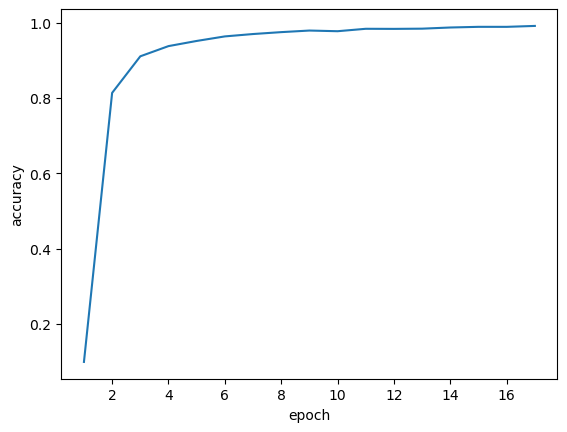

In [10]:
plt.plot(np.arange(1, 18), train_acc_list)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

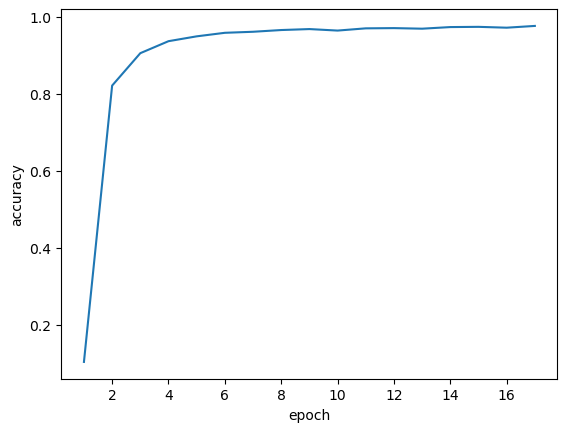

In [11]:
plt.plot(np.arange(1, 18), test_acc_list)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()